# Heart Disease Prediction

This Notebook has a model which tells a person have heart disease or not. And dataset includes all heart disease information. 
Dataset Columns here are : 
* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

First we are going to unzip the file then we will start our preprocessing and making model.

#### Here we go ::::::

In [7]:
import zipfile
import re

In [9]:
zip_ref = zipfile.ZipFile(r'archive.zip', 'r')
zip_ref.extractall(r'C:\\Users\\Sunshine\\Downloads\\datasets\\Sunday Project\\Heart Disease')
zip_ref.close()

#### Import Relevent Libraries 

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Look at our dataset 
data = pd.read_csv(r'heart.csv')

In [14]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Just look at the dataset it contains only integer values so **No need** to do any preprocessing in this.

Then look at our Target values it is either 0 or 1 so **What is this**
Guys : it is a classification problem as simple as that.

In [15]:
data.target.unique()

array([1, 0], dtype=int64)

In [16]:
# info method tells about the datatypes of all columns in the dataset.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [17]:
# It is a small dataset as you can see just 303 values
data.shape

(303, 14)

In [21]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


##### Split our Dataset into X and y

In [22]:
X = data.iloc[:, 0:13].values
y = data.iloc[:, 13].values

In [23]:
X

array([[63.,  1.,  3., ...,  0.,  0.,  1.],
       [37.,  1.,  2., ...,  0.,  0.,  2.],
       [41.,  0.,  1., ...,  2.,  0.,  2.],
       ...,
       [68.,  1.,  0., ...,  1.,  2.,  3.],
       [57.,  1.,  0., ...,  1.,  1.,  3.],
       [57.,  0.,  1., ...,  1.,  1.,  2.]])

In [24]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

As we can see that no need of preprocessing here. (Very Good).

### Feature Engineering

**Extra Tree Classifier** is a classifier which gives us imoprtances of all features. Actually the story is it compare all the feature in finding of Target value individually. 

In [50]:
from sklearn.ensemble import ExtraTreesClassifier

In [57]:
# n_estimator is parameter which try through all the dataset n times
clf = ExtraTreesClassifier(n_estimators=100, random_state=0)

In [58]:
clf.fit(X, y)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=0, verbose=0,
                     warm_start=False)

#### Importances of Features & Graph Plotting

In [59]:
important_features = clf.feature_importances_

In [60]:
important_features.max()

0.12608945197263643

In [61]:
important_features

array([0.07265019, 0.05505127, 0.1200804 , 0.06159419, 0.0606502 ,
       0.01953854, 0.03698694, 0.08991519, 0.10158049, 0.08490125,
       0.06407965, 0.12608945, 0.10688224])

In [68]:
columns = data.columns

In [70]:
cols = columns[0:13]

In [71]:
cols

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

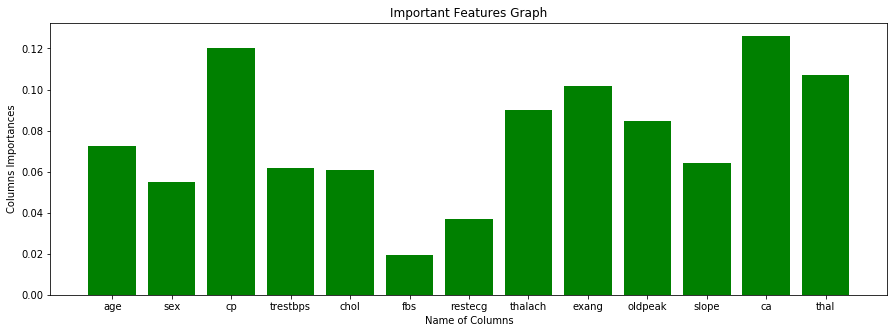

In [79]:
plt.figure(figsize = (15, 5))
plt.bar(cols, important_features, color = "green")

plt.xlabel("Name of Columns")
plt.ylabel("Columns Importances")

plt.title("Important Features Graph")
plt.show()

In [84]:
print(important_features)
print(cols)

[0.07265019 0.05505127 0.1200804  0.06159419 0.0606502  0.01953854
 0.03698694 0.08991519 0.10158049 0.08490125 0.06407965 0.12608945
 0.10688224]
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')


This code is for finding the column name from data which has greater feature importances than a particular threshold value
**Note : In this case it is 0.08**

In [85]:
important_columns = []
for i in range(len(important_features)):
    if(important_features[i] >= 0.08):
        important_columns.append(cols[i])

In [86]:
important_columns

['cp', 'thalach', 'exang', 'oldpeak', 'ca', 'thal']

Now we have our new X and y here. Yeah y is same as previous but X has some changes in it.

In [88]:
X_new = data.iloc[:, [2, 7, 8, 9, 11, 12]].values

In [89]:
X_new

array([[  3. , 150. ,   0. ,   2.3,   0. ,   1. ],
       [  2. , 187. ,   0. ,   3.5,   0. ,   2. ],
       [  1. , 172. ,   0. ,   1.4,   0. ,   2. ],
       ...,
       [  0. , 141. ,   0. ,   3.4,   2. ,   3. ],
       [  0. , 115. ,   1. ,   1.2,   1. ,   3. ],
       [  1. , 174. ,   0. ,   0. ,   1. ,   2. ]])

In [90]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### Splittion of Dataset into Train and Test

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.1)

In [93]:
X_train

array([[0.00e+00, 1.71e+02, 0.00e+00, 1.50e+00, 0.00e+00, 2.00e+00],
       [0.00e+00, 1.18e+02, 1.00e+00, 1.00e+00, 1.00e+00, 2.00e+00],
       [0.00e+00, 1.16e+02, 1.00e+00, 3.20e+00, 2.00e+00, 2.00e+00],
       ...,
       [3.00e+00, 1.31e+02, 0.00e+00, 1.00e-01, 1.00e+00, 2.00e+00],
       [1.00e+00, 1.63e+02, 0.00e+00, 0.00e+00, 0.00e+00, 2.00e+00],
       [1.00e+00, 1.62e+02, 0.00e+00, 0.00e+00, 0.00e+00, 2.00e+00]])

In [94]:
y_train

array([1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

In [95]:
y_test

array([0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1], dtype=int64)

In [96]:
X_test

array([[  0. , 162. ,   1. ,   0. ,   1. ,   3. ],
       [  2. , 142. ,   0. ,   1.5,   1. ,   2. ],
       [  3. , 155. ,   0. ,   0.6,   0. ,   3. ],
       [  0. , 143. ,   1. ,   3. ,   1. ,   3. ],
       [  0. , 150. ,   1. ,   1.9,   2. ,   3. ],
       [  0. , 144. ,   1. ,   4. ,   2. ,   3. ],
       [  2. , 148. ,   0. ,   0.8,   0. ,   2. ],
       [  1. , 179. ,   0. ,   0. ,   2. ,   2. ],
       [  0. , 161. ,   0. ,   0.5,   0. ,   3. ],
       [  2. , 156. ,   0. ,   0. ,   0. ,   2. ],
       [  0. , 111. ,   1. ,   0. ,   0. ,   3. ],
       [  0. , 115. ,   1. ,   1.2,   1. ,   3. ],
       [  0. , 114. ,   0. ,   1. ,   3. ,   3. ],
       [  0. , 108. ,   1. ,   1.5,   3. ,   2. ],
       [  2. , 179. ,   0. ,   0. ,   0. ,   2. ],
       [  1. , 164. ,   0. ,   0. ,   1. ,   2. ],
       [  0. , 126. ,   1. ,   0.9,   0. ,   3. ],
       [  2. , 146. ,   0. ,   1.8,   3. ,   3. ],
       [  1. , 175. ,   0. ,   0.6,   0. ,   2. ],
       [  0. , 140. ,   0. ,   

Till now we have done our preprocesings or Feature extractions and all.

### Model Making

In [97]:
from sklearn.tree import DecisionTreeClassifier as dtc

In [107]:
classifier = dtc(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, 
                 min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, 
                 random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, 
                 min_impurity_split=None, class_weight=None)

In [108]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [109]:
y_pred = classifier.predict(X_test)

In [110]:
y_pred

array([0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [111]:
y_test

array([0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1], dtype=int64)

#### Cross Val Scores

In [113]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier, X_train, y_train, cv=5)

In [114]:
scores

array([0.78571429, 0.81481481, 0.85185185, 0.68518519, 0.77777778])

In [115]:
classifier.score(X_test, y_test)

0.7741935483870968

In [118]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix

#### Confusion Matrix

In [119]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

In [120]:
conf_matrix

array([[11,  1],
       [ 6, 13]], dtype=int64)

#### Precision Scores

In [121]:
print('Precision: %.3f' % precision_score(y_test, y_pred))

Precision: 0.929


#### Recall Scores

In [122]:
print('Recall: %.3f' % recall_score(y_test, y_pred))

Recall: 0.684


#### Accuracy Scores

In [123]:
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.774


#### F1 Scores

In [124]:
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

F1 Score: 0.788
